In [1]:
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import matplotlib as mpl
import numpy as np
#%matplotlib notebook
%matplotlib inline

In [7]:

#c = np.loadtxt("c18-06-24-12_00.csv",skiprows=1,usecols=(0,1,2,3,4),delimiter=",")
b = np.loadtxt('minix_log.txt',skiprows=0,usecols=(0,1),delimiter=",")
print(b.shape)

# determine approximate sampling rate

time = b[:,0]

sper = np.mean(np.diff(time))
print("Sampling rate: " + str(1/sper))

(221, 2)
Sampling rate: 31.931019490739438


In [5]:

#c = np.loadtxt("c18-06-24-12_00.csv",skiprows=1,usecols=(0,1,2,3,4),delimiter=",")
b = np.loadtxt("11breath.log",skiprows=0,usecols=(0,1),delimiter=",")
print(b.shape)

(114L, 2L)


In [5]:

#c = np.loadtxt("c18-06-24-12_00.csv",skiprows=1,usecols=(0,1,2,3,4),delimiter=",")
b = np.loadtxt("11breath.log",skiprows=0,usecols=(0,1),delimiter=",")
print(b.shape)

(114L, 2L)


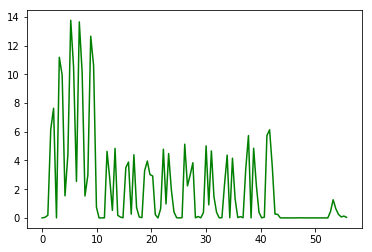

In [7]:
time =b[:,0]
time = (time - time[0])


plt.plot(time,b[:,1],'g')
plt.savefig("graph.png")


In [40]:
dawn = np.where((time > 5.5) * (time < 10.))

In [41]:
#print(dawn)
start = int(4*3600)
end = int(22.0*3600)
tbase = (c[start:end,0] - c[0,0])/3600.
#plt.plot(tbase,c[start:end,1],'r')

In [42]:
red = c[start:end,1]
grn = c[start:end,2]
blu = c[start:end,3]

mmax = np.max([np.max(red), np.max(blu), np.max(grn)])

red = red/mmax
grn = grn/mmax
blu = blu/mmax




colors = []
for i, r in enumerate(red):
    colors.append(mpl.colors.to_rgb((red[i],grn[i],blu[i])))

#print(colors)


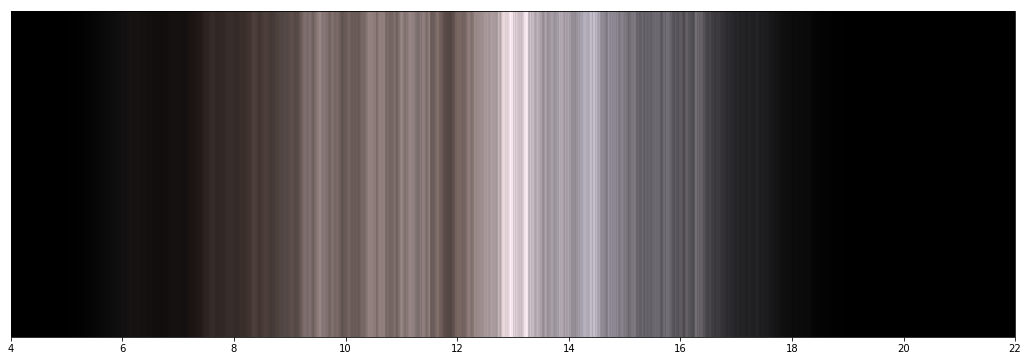

In [43]:
mpl.rcParams['figure.figsize'] = (18, 6)

fig, ax = plt.subplots()

#cmap = mpl.cm.cool
#colors = ["#eaa941", "#efef39", "#53a447", "#3b387f", "#48a2ba"]
cmap= mpl.colors.ListedColormap(colors)

norm = mpl.colors.Normalize(vmin=4, vmax=22.0)

cb1 = mpl.colorbar.ColorbarBase(ax, cmap=cmap,
                                norm=norm,
                                orientation='horizontal')
#cb1.set_label('Some Units')
fig.show()
plt.savefig("colorbar.png")

In [44]:
print(65535/mmax)

2.3120479802434293


In [45]:
with open('skycolors.csv', 'w+') as f:
    for i, r in enumerate(red):
        f.write("{:f},{:f},{:f}\n".format(red[i],grn[i],blu[i]))

    

(3L, 59887L)
(3000L, 5989L, 3L)


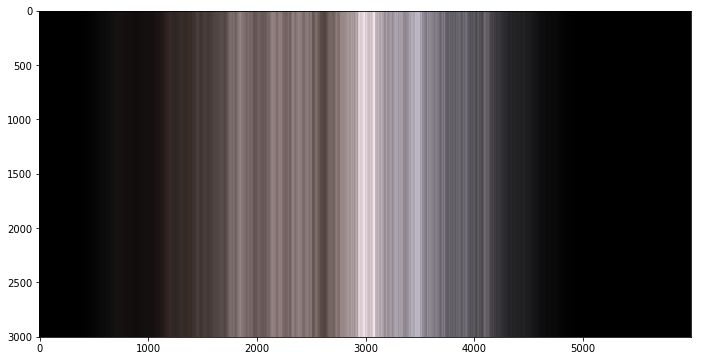

In [46]:


import scipy.signal

def proc_map():
    pass

from PIL import Image, ImageDraw

colors = np.array((red, grn,blu))
print colors.shape
dcol =  scipy.signal.decimate(colors, 10, n=None, ftype='iir', axis=1, zero_phase=True)

dcol_wide = np.multiply.outer(np.ones((3000)),dcol)
dcol_wide = np.swapaxes(dcol_wide,1,2)
print dcol_wide.shape

#img = Image.new('RGB', dcol, color = 'red')

#img.save('pil_red.png')

plt.imshow(dcol_wide)